In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('analyst3.csv')

#### Dataset extraido usando selenium

In [3]:
df.head()

,Unnamed: 0,Categ de trabajos,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Analista de Siniestros en el Ramo de Vida con ...,Sweaden,A convenir,Administración / Contabilidad / Finanzas,Administración,Quito,29/07/2020 - 16:55:22 pm,Tiempo Completo,Contrato por tiempo indefinido
1,1,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Rector de Escuela elemental Básica,We Connect,A convenir,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 13:46:23 pm,Tiempo Completo,Contrato por tiempo indefinido
2,2,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Director académico,We Connect,A convenir,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 12:25:25 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Asistente Técnico Financiero,CONSEJO NORUEGO PARA REFUGIADOS,"1.000,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Tulcán,29/07/2020 - 11:50:55 am,Tiempo Completo,Contrato por tiempo determinado
4,4,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Guardia,JG Construcciones S.A.,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,29/07/2020 - 11:30:05 am,Tiempo Completo,Contrato por tiempo indefinido


#### Limpiando la columna Salario

In [4]:
df['Salario'] = df['Salario'].str.rstrip(' US$ (Neto mensual)')
df['Salario'] = df['Salario'].str.lstrip('$ ')
df['Salario'] = df['Salario'].str.replace(',00', '')
df['Salario'] = df['Salario'].str.rstrip(' US$ (M')
df['Salario'] = df['Salario'].str.replace('.','')

In [5]:
df.head()

,Unnamed: 0,Categ de trabajos,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Analista de Siniestros en el Ramo de Vida con ...,Sweaden,A convenir,Administración / Contabilidad / Finanzas,Administración,Quito,29/07/2020 - 16:55:22 pm,Tiempo Completo,Contrato por tiempo indefinido
1,1,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Rector de Escuela elemental Básica,We Connect,A convenir,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 13:46:23 pm,Tiempo Completo,Contrato por tiempo indefinido
2,2,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Director académico,We Connect,A convenir,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 12:25:25 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Asistente Técnico Financiero,CONSEJO NORUEGO PARA REFUGIADOS,1000,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Tulcán,29/07/2020 - 11:50:55 am,Tiempo Completo,Contrato por tiempo determinado
4,4,ADMINISTRACIÓN / CONTABILIDAD / FINANZAS,Guardia,JG Construcciones S.A.,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,29/07/2020 - 11:30:05 am,Tiempo Completo,Contrato por tiempo indefinido


#### Eliminar la columna 'Unnamed: 0' y 'Categ de trabajos'

In [6]:
df = df.drop(['Unnamed: 0', 'Categ de trabajos'], axis=1)

#### Convertir datos string a float sin tomar en cuenta NaN

In [7]:
df['Salario'] = pd.to_numeric(df['Salario'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre de trabajo  284 non-null    object 
 1   Compania           284 non-null    object 
 2   Salario            122 non-null    float64
 3   Categoria          284 non-null    object 
 4   Subcategoria       284 non-null    object 
 5   Localidad          284 non-null    object 
 6   Activo desde       284 non-null    object 
 7   Jornada            284 non-null    object 
 8   Tipo de contrato   284 non-null    object 
dtypes: float64(1), object(8)
memory usage: 20.1+ KB


#### Promedio de salarios por categoria

In [9]:
seriesSalarios = df.groupby('Categoria')['Salario'].mean()

In [10]:
seriesSalarios

Categoria
Administración / Contabilidad / Finanzas            614.000000
Almacenamiento / Logística / Distribución           597.214286
Arquitectura / Ingenierías                          705.555556
Comercial / Ventas / Atención al Cliente            469.625000
Compras / Comercio Exterior                         757.285714
Construcción / Obras / Edificaciones               1036.909091
Diseño / Decoración / Artes Gráficas                454.181818
Docencia / Educación                                399.875000
Hotelería / Turismo                                 425.555556
Informática / Telecomunicaciones                    737.500000
Legal / Asesoría                                   1000.000000
Marketing / Publicidad / Producción Audiovisual     966.666667
Medicina / Salud                                    908.000000
Producción / Mantenimiento / Operaciones            440.100000
Recursos Humanos / Relaciones Públicas              795.076923
Name: Salario, dtype: float64

#### Porcentaje de los salarios por cada categoria de trabajo

In [11]:
seriesPctSalario = seriesSalarios*100/seriesSalarios.sum()

In [12]:
seriesPctSalario

Categoria
Administración / Contabilidad / Finanzas            5.956801
Almacenamiento / Logística / Distribución           5.793952
Arquitectura / Ingenierías                          6.845039
Comercial / Ventas / Atención al Cliente            4.556128
Compras / Comercio Exterior                         7.346906
Construcción / Obras / Edificaciones               10.059709
Diseño / Decoración / Artes Gráficas                4.406304
Docencia / Educación                                3.879440
Hotelería / Turismo                                 4.128583
Informática / Telecomunicaciones                    7.154953
Legal / Asesoría                                    9.701631
Marketing / Publicidad / Producción Audiovisual     9.378243
Medicina / Salud                                    8.809081
Producción / Mantenimiento / Operaciones            4.269688
Recursos Humanos / Relaciones Públicas              7.713543
Name: Salario, dtype: float64

#### Analisis Univariado

#### Grafico de barras de los promedios de los salarios por categoria de trabajo

In [13]:
%matplotlib inline

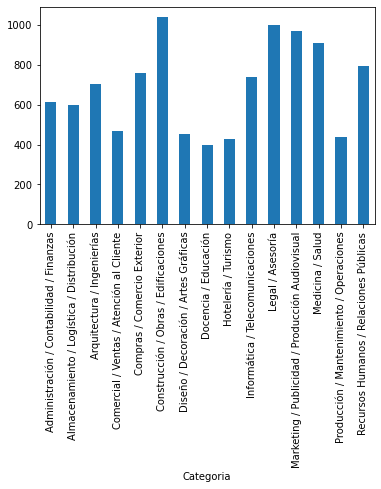

In [14]:
seriesSalarios.plot.bar()

#### Grafico de barras de jornadas de trabajos

In [15]:
seriesJornada = df['Jornada'].value_counts()

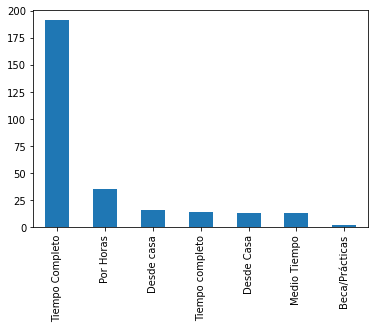

In [16]:
seriesJornada.plot.bar()

#### Grafica de barras de tipos de contratos 

In [17]:
seriesTipoContrato = df['Tipo de contrato'].value_counts()

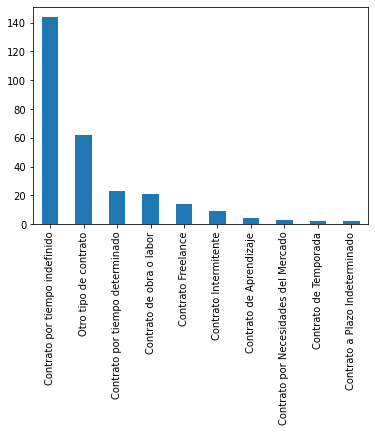

In [18]:
seriesTipoContrato.plot.bar()

#### Grafico de barras de Localidad

In [19]:
seriesLocalidad = df['Localidad'].value_counts()

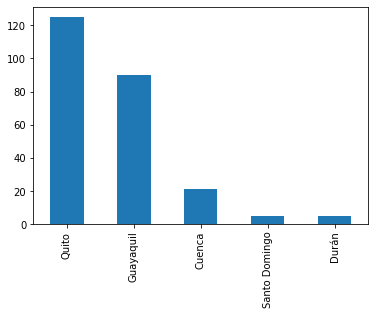

In [20]:
seriesLocalidad[0:5].plot.bar()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Grafico de cajas para promedio de salarios y salarios

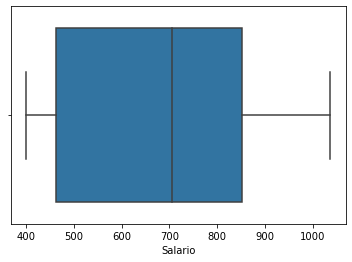

In [22]:
bxp1 = sns.boxplot(x=seriesSalarios) 

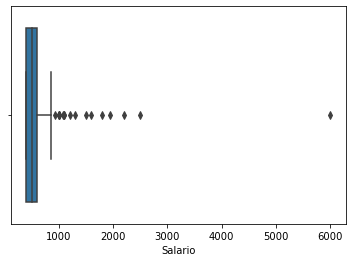

In [23]:
bxp2 = sns.boxplot(x=df['Salario']) 

#### Implementacion de la funcion apply y colocando un nuevo campo al dataset

In [24]:
def sueldoCategorico(salario):
    if salario >= 400 and salario <= 1000:
        return "Mayor"
    elif salario < 400:
        return "Menor"
    elif salario > 1000:
        return "Excelente"
    else:
        return "No mostro caracteristica"

df['Salario por categoria'] = df.apply(lambda x: sueldoCategorico(x['Salario']), axis=1)

In [25]:
df.head(5)

,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato,Salario por categoria
0,Analista de Siniestros en el Ramo de Vida con ...,Sweaden,NaN,Administración / Contabilidad / Finanzas,Administración,Quito,29/07/2020 - 16:55:22 pm,Tiempo Completo,Contrato por tiempo indefinido,No mostro caracteristica
1,Rector de Escuela elemental Básica,We Connect,NaN,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 13:46:23 pm,Tiempo Completo,Contrato por tiempo indefinido,No mostro caracteristica
2,Director académico,We Connect,NaN,Administración / Contabilidad / Finanzas,Dirección y Gerencia,Cuenca,29/07/2020 - 12:25:25 pm,Tiempo Completo,Contrato por tiempo indefinido,No mostro caracteristica
3,Asistente Técnico Financiero,CONSEJO NORUEGO PARA REFUGIADOS,1000.0,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Tulcán,29/07/2020 - 11:50:55 am,Tiempo Completo,Contrato por tiempo determinado,Mayor
4,Guardia,JG Construcciones S.A.,NaN,Administración / Contabilidad / Finanzas,Administración,Guayaquil,29/07/2020 - 11:30:05 am,Tiempo Completo,Contrato por tiempo indefinido,No mostro caracteristica


#### Analisis multivariado 

#### Analisis de los 'Salarios' de cada 'Categoria' de trabajo en la 'Localidad' donde se requieren

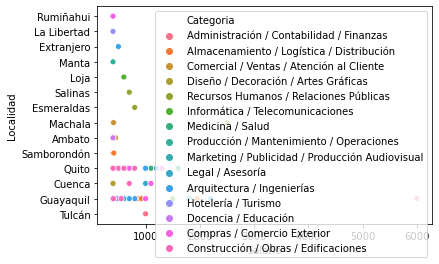

In [26]:
g = sns.scatterplot(x="Salario", y="Localidad", hue="Categoria", data=df)

#### Analisis de los 'Salarios' y el 'tipo de contrato' de trabajo en la 'Localidad' donde se requieren

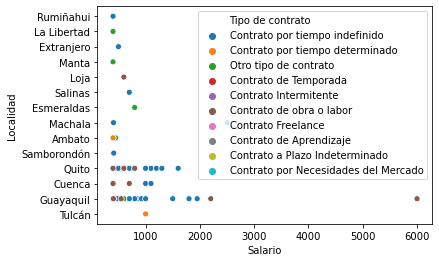

In [27]:
m = sns.scatterplot(x="Salario", y="Localidad", hue="Tipo de contrato", data=df)